# Proyecto 2: Ingeniería de features, modelos avanzados e interpretación de modelos

## PARTE A - Transformación de Datos

Para empezar voy a importar las librerias, inicializar nuevamente el Dataset y luego realizare algunas transformaciones de datos para obtener mejores resultados.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set()
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [106]:
# SE DEBE MODIFICAR EL PATH PARA PODER EJECUTARLO
data = pd.read_csv("C:/Users/Usuario/Documents/DATA SCIENCE/DATA SETS/DS_Proyecto_01_Datos_Properati.csv")

In [107]:
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


Voy a partir de filtrar el dataset para aquellos inmuebles que son de tipo PH, Casa y Departamento, ya que estos son mayoria (visto en el primer proyecto)

In [108]:
mascaraPropiedad = (data.property_type=="Departamento") | (data.property_type =="Casa") | (data.property_type=="PH" )
data = data[mascaraPropiedad] 

data.shape

(143145, 19)

### Detección y eliminación de Outliers

Decidi realizar la deteccion y eliminacion de outliers ya que en el proyecto 1 vi que hay muchas variables que tienen datos que no son normales o comunes en comparación al resto, por lo tanto capaz estos datos hacen que las predicciones no sean tan acertadas como podrian ser. 

Para ello utilizare la regla de 3 sigmas, crearé una funcion que me determine el maximo y el minimo de la variable en cuestion.

In [109]:
def tresSigmas(info):
    valor_medio = info.mean()
    std = info.std()
    minimo = valor_medio - 3*std
    maximo = valor_medio + 3*std
    return [minimo, maximo]

Copio el dataset en una nueva variable para poder manipularla y tambien seguir teniendo nuestro dataset original

In [110]:
data_filtro = data.copy()

#### Latitud

In [111]:
minimo, maximo =tresSigmas(data_filtro.lat)

Una vez que ya sabemos cual es el maximo y el minimo podemos filtrar por ellos y visualizar como queda nuestra variable sin los outliers

In [112]:
data_filtro = data_filtro[data_filtro.lat < maximo]

In [113]:
data_filtro = data_filtro[data_filtro.lat > minimo]

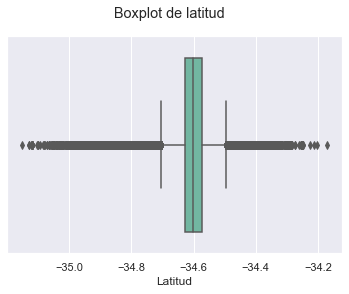

(133548, 19)

In [114]:
sns.boxplot(data=data_filtro, x="lat", palette="Set2")
plt.suptitle('Boxplot de latitud')
plt.xlabel("Latitud")
plt.show()
data_filtro.shape

#### Longitud

In [115]:
minimo, maximo =tresSigmas(data_filtro.lon)
data_filtro = data_filtro[data_filtro.lon < maximo]
data_filtro = data_filtro[data_filtro.lon > minimo]

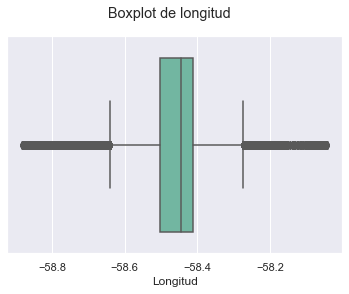

(128695, 19)

In [116]:
sns.boxplot(data=data_filtro, x="lon", palette="Set2")
plt.suptitle('Boxplot de longitud')
plt.xlabel("Longitud")
plt.show()
data_filtro.shape

Vemos que tanto en la variable de longitud y latitud queda mucho bigote, creo que esto se debe a que los valores de estas variables tienen diferencias muy pequeñas entre si.

#### Rooms

In [117]:
minimo, maximo =tresSigmas(data_filtro.rooms)
data_filtro = data_filtro[data_filtro.rooms < maximo]
data_filtro = data_filtro[data_filtro.rooms > minimo]

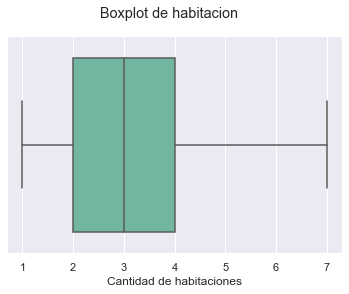

(127483, 19)

In [118]:
sns.boxplot(data=data_filtro, x="rooms", palette="Set2")
plt.suptitle('Boxplot de habitacion')
plt.xlabel("Cantidad de habitaciones")
plt.show()
data_filtro.shape

#### Bedrooms

In [119]:
minimo, maximo =tresSigmas(data_filtro.bedrooms)
data_filtro = data_filtro[data_filtro.bedrooms < maximo]
data_filtro = data_filtro[data_filtro.bedrooms > minimo]

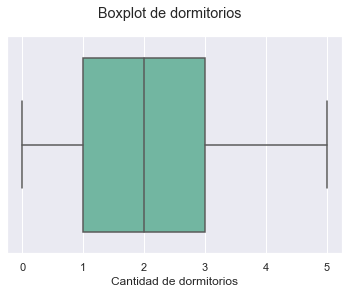

(127018, 19)

In [120]:
sns.boxplot(data=data_filtro, x="bedrooms", palette="Set2")
plt.suptitle('Boxplot de dormitorios')
plt.xlabel("Cantidad de dormitorios")
plt.show()
data_filtro.shape

Ademas filtraré aquellos que tienen cantidad de dormitorios en 0, ya que se trataría de un error

In [121]:
data_filtro = data_filtro[data_filtro.bedrooms > 0  ]

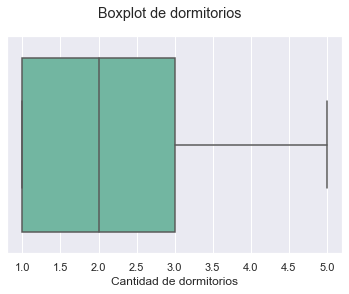

(121983, 19)

In [122]:
sns.boxplot(data=data_filtro, x="bedrooms", palette="Set2")
plt.suptitle('Boxplot de dormitorios')
plt.xlabel("Cantidad de dormitorios")
plt.show()
data_filtro.shape

#### Bathrooms


In [123]:
minimo, maximo =tresSigmas(data_filtro.bathrooms)
data_filtro = data_filtro[data_filtro.bathrooms < maximo]
data_filtro = data_filtro[data_filtro.bathrooms > minimo]

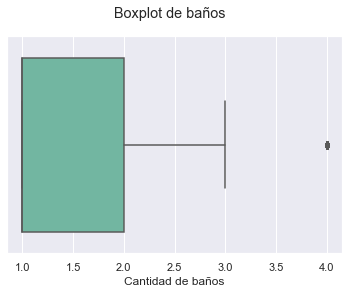

(118028, 19)

In [124]:
sns.boxplot(data=data_filtro, x="bathrooms", palette="Set2")
plt.suptitle('Boxplot de baños')
plt.xlabel("Cantidad de baños")
plt.show()
data_filtro.shape

Evaluo la cantidad de propiedades con mas de 3 baños

In [125]:
len(data_filtro[data_filtro.bathrooms > 3])

2924

Al no ser tantas propiedades, decido conservarlas ya que si bien queda como bigote dentro de nuestro boxplot no es una diferencia muy grande por lo que no afectara a nuestro dataset

#### Superficie total y cubierta

Empiezo filtrando por aquellas que no cumplen con que la superficie total sea mayor o igual a la cubierta

In [126]:
data_filtro[data_filtro.surface_total < data_filtro.surface_covered]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
446,2019-03-04,2019-08-17,2019-03-04,-34.613369,-58.488637,Argentina,Capital Federal,Villa Santa Rita,5.0,4.0,3.0,230.0,244.0,490000.0,USD,VENTA CASA 5 AMBIENTES,Corredor Responsable: Mónica Silvia Martinuzzi...,Casa,Venta
476,2019-03-04,2019-08-17,2019-03-04,-34.779414,-58.391520,Argentina,Bs.As. G.B.A. Zona Sur,Lomas de Zamora,4.0,2.0,1.0,148.0,11098.0,129000.0,USD,Casa a refaccionar en bonita zona Temperley,Corredor Responsable: FRANCISCO D'ATRI - CPMCA...,Casa,Venta
602,2019-04-25,2019-08-17,2019-04-25,-34.657972,-58.670631,Argentina,Bs.As. G.B.A. Zona Oeste,Ituzaingó,1.0,1.0,1.0,32.0,33.0,65000.0,USD,OPORTUNIDAD Venta Monoambiente Ituzaingo Centro,Corredor Responsable: Hernan Perrone - CMCPDJM...,Departamento,Venta
783,2019-04-25,2019-08-17,2019-04-25,-34.334050,-58.796940,Argentina,Bs.As. G.B.A. Zona Norte,Escobar,3.0,2.0,1.0,33.0,187.0,115000.0,USD,Oportunidad! Casa de 3 Amb en Belen de Escobar,Corredor Responsable: MAURO MARVISI - CSI 5574...,Casa,Venta
785,2019-04-25,2019-08-17,2019-04-25,-34.681012,-58.375710,Argentina,Bs.As. G.B.A. Zona Sur,Avellaneda,3.0,2.0,2.0,159.0,179.0,197000.0,USD,"VENTA CASA AL FRENTE 3 AMB C/GARAGE, PATIO, TE...",Corredor Responsable: ANDREA VAZQUEZ - CSI 625...,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145293,2020-01-15,2020-02-07,2020-01-15,-34.763600,-58.405368,Argentina,Bs.As. G.B.A. Zona Sur,Lomas de Zamora,3.0,2.0,2.0,72.0,73.0,185000.0,USD,"DEPARTAMENTO EN LAS LOMITAS, CON SUM, GYM Y SAUNA",Corredor Responsable: FRANCISCO D'ATRI - CPMCA...,Departamento,Venta
145347,2020-01-15,9999-12-31,2020-01-15,-34.648990,-58.603563,Argentina,Bs.As. G.B.A. Zona Oeste,Morón,5.0,3.0,1.0,134.0,160.0,210000.0,USD,Casa en venta HAEDO SUR 5 ambientes GARAGE,Corredor Responsable: GRACIELA MENAZZI - CMCPD...,Casa,Venta
145376,2020-01-15,2020-02-05,2020-01-15,-34.650700,-58.385906,Argentina,Capital Federal,Barracas,6.0,4.0,2.0,197.0,290.0,329900.0,USD,CASA 6 AMBIENTES LOTE PROPIO BARRACAS,Corredor Responsable: GUILLERMO FRIMET - CUCIC...,Casa,Venta
145383,2020-01-15,2020-02-05,2020-01-15,-34.647387,-58.388259,Argentina,Capital Federal,Barracas,7.0,5.0,1.0,124.0,170.0,99000.0,USD,Excelente OP/ Casa lote propio a refaccionar !!,Corredor Responsable: GUILLERMO FRIMET - CUCIC...,Casa,Venta


Estos valores son incorrectos, la superficie cubierta no puede ser mayor a la total, por lo tanto eliminare estos inmubles.

In [127]:
data_filtro= data_filtro[data_filtro.surface_total > data_filtro.surface_covered]

##### Superficie total:

In [128]:
minimo, maximo =tresSigmas(data_filtro.surface_total)
data_filtro = data_filtro[data_filtro.surface_total < maximo]
data_filtro = data_filtro[data_filtro.surface_total > minimo]

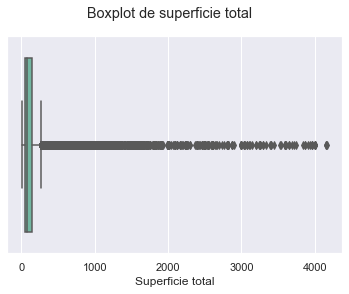

(76050, 19)

In [129]:
sns.boxplot(data=data_filtro, x="surface_total", palette="Set2")
plt.suptitle('Boxplot de superficie total')
plt.xlabel("Superficie total")
plt.show()
data_filtro.shape

##### Superficie cubierta:

In [130]:
minimo, maximo =tresSigmas(data_filtro.surface_covered)
data_filtro = data_filtro[data_filtro.surface_covered < maximo]
data_filtro = data_filtro[data_filtro.surface_covered > minimo]

In [131]:
data_filtro =data_filtro[data_filtro.surface_covered < 300]

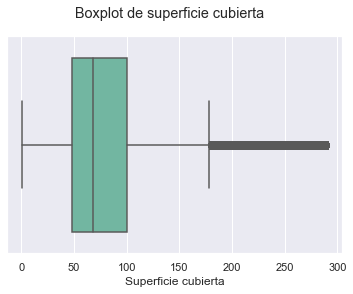

(74832, 19)

In [132]:
sns.boxplot(data=data_filtro, x="surface_covered", palette="Set2")
plt.suptitle('Boxplot de superficie cubierta')
plt.xlabel("Superficie cubierta")
plt.show()
data_filtro.shape

#### Precio

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

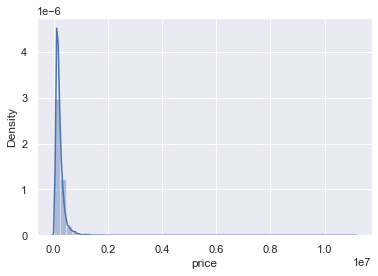

In [133]:
sns.distplot(data_filtro.price)

Con el grafico anterior observamos que hay valores muy variados del precio

In [134]:
minimo, maximo =tresSigmas(data_filtro.price)
data_filtro = data_filtro[data_filtro.price < maximo]
data_filtro = data_filtro[data_filtro.price > minimo]

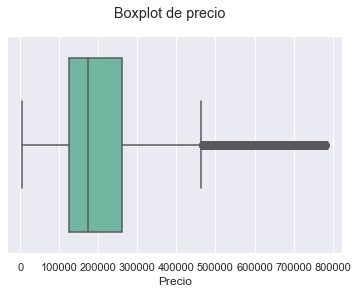

(73561, 19)

In [135]:
sns.boxplot(data=data_filtro, x="price", palette="Set2")
plt.suptitle('Boxplot de precio')
plt.xlabel("Precio")
plt.show()
data_filtro.shape

Determinare una copia hasta el momento del dataset que lo utilizare al momento de realizar clustering

In [136]:
data_clus = data_filtro.copy()

### Encoding

Creo que es necesario realizar encoding ya que hay datos categoricos que son importantes y si no realizamos encoding no podremos utilizarlo en nuestro modelo, perdiendo información valiosa. Analizaré a continuación que variables categoricas valen la pena realizar enconding y cuales no. 

Primero realizare enconding para pasar los tipos de propiedades a un dato numerico. Para ello utilizare la funcion de get_dummies de pandas ya que al ser pocas variables no aumenta mucho la cantidad de columnas y le asigna el mismo peso a cada una de las propiedades, ya que una casa no es mejor que un PH, ni un departamento, ni al reves. Por otro lado, las demás variables categoricas las trataré mas adelante

In [137]:
data_filtro = pd.get_dummies(data, columns=['property_type'], drop_first=True)

In [138]:
data_filtro.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,operation_type,property_type_Departamento,property_type_PH
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Venta,1,0
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,Venta,0,1
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",Venta,0,1
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,Venta,0,1
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,Venta,0,1


In [139]:
data_filtro.shape

(143145, 20)

Ahora tenemos 2 columnas mas en el data set que nos indican cuando el tipo de propiedad. Cuando property_type_Departamento sea 1 indica que es departamento, cuadno property_type_PH sea 1 indica que es PH, cuando ambas sean cero indica que es Casa.

Otras variables categoricas que tenemos es "operation_type", "currency", "title" y "description", vamos a ver que valores toma cada uno:

In [140]:
data['operation_type'].value_counts()

Venta    143145
Name: operation_type, dtype: int64

In [141]:
data['currency'].value_counts()

USD    143145
Name: currency, dtype: int64

Como vemos que "operation_type" toma siempre valor "Venta" y "currency" toma siempre el valor "USD" podemos eliminar estas dos columnas del data set ya que no nos aporta ninguna información

In [142]:
data_filtro = data_filtro.drop(columns = ['operation_type','currency'])
data_filtro

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type_Departamento,property_type_PH
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,1,0
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,0,1
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",0,1
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,0,1
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,1,0
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,1,0
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",1,0
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,1,0


Por el momento las columnas 'title' y 'description' no las podemos leer, asique tambien las eliminare.

In [143]:
data_filtro = data_filtro.drop(columns = ['title','description'])
data_filtro

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Departamento,property_type_PH
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,1,0
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,0,1
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,0,1
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,0,1
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,1,0
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,1,0
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,1,0
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,1,0


En tanto a las variables categoricas l1, l2 y l3, las trabajaré mas adelante junto con la latitud y longitud

### Imputación de valores faltantes

Primero debemos ver la cantidad de valores nulos que tiene nuestro dataset

In [144]:
print("La cantidad de null por columna:")
datosNull = data_filtro.isna().sum()
datosNull

La cantidad de null por columna:


start_date                        0
end_date                          0
created_on                        0
lat                            9593
lon                            9624
l1                                0
l2                                0
l3                                0
rooms                             0
bedrooms                          0
bathrooms                      4211
surface_total                 18623
surface_covered               18909
price                             0
property_type_Departamento        0
property_type_PH                  0
dtype: int64

El porcentaje de nulos de cada variable:

In [145]:
dataPieChart = data_filtro.isna().sum()/data_filtro.shape[0]*100
print(dataPieChart[dataPieChart !=0])

lat                 6.701596
lon                 6.723253
bathrooms           2.941772
surface_total      13.009885
surface_covered    13.209682
dtype: float64


Viendo los porcentajes de valores nulos de cada variable, considero que es necesario realizar imputacion de estos valores ya que son valores altos y sino, seria mucha informacion que se pierde. 

Ahora que ya sabemos donde estan los valores nulos, voy a empezar a buscar relaciones entre las variables para ver si se pueden imputar los datos



#### Bathrooms

Text(0, 0.5, 'Baños')

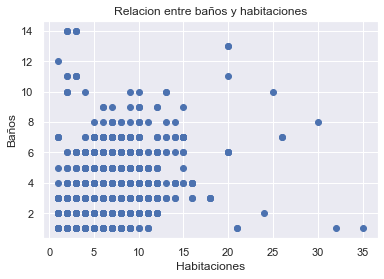

In [146]:
plt.scatter(data_filtro.rooms, data_filtro.bathrooms)
plt.title('Relacion entre baños y habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Baños')

Text(0, 0.5, 'Baños')

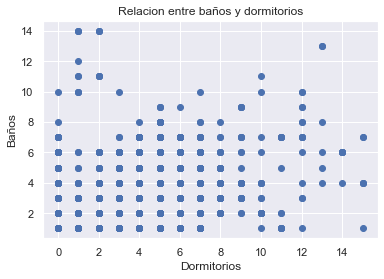

In [147]:
plt.scatter(data_filtro.bedrooms, data_filtro.bathrooms)
plt.title('Relacion entre baños y dormitorios')
plt.xlabel('Dormitorios')
plt.ylabel('Baños')

In [148]:
data_filtro[data_filtro["bathrooms"].isna()]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Departamento,property_type_PH
351,2019-03-04,2019-07-29,2019-03-04,-34.613973,-58.391633,Argentina,Capital Federal,Congreso,1.0,1.0,NaN,23.0,23.0,72000.0,1,0
360,2019-03-04,2019-03-12,2019-03-04,-34.619823,-58.437283,Argentina,Capital Federal,Caballito,1.0,1.0,NaN,14.0,14.0,27000.0,1,0
438,2019-03-04,2019-07-29,2019-03-04,-34.578135,-58.461733,Argentina,Capital Federal,Villa Ortuzar,4.0,3.0,NaN,88.0,88.0,192000.0,1,0
473,2019-03-04,2019-07-15,2019-03-04,-34.683016,-58.354596,Argentina,Bs.As. G.B.A. Zona Sur,Avellaneda,3.0,2.0,NaN,370.0,370.0,149000.0,0,0
573,2019-07-09,2019-07-10,2019-07-09,-34.621374,-58.442597,Argentina,Capital Federal,Caballito,2.0,1.0,NaN,25.0,23.0,70000.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141172,2019-07-31,2019-09-04,2019-07-31,-34.481880,-58.588643,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,3.0,2.0,NaN,128.0,128.0,398000.0,1,0
141225,2019-07-31,2019-08-14,2019-07-31,-34.594709,-58.384238,Argentina,Capital Federal,Recoleta,6.0,5.0,NaN,137.0,130.0,460000.0,1,0
143631,2019-07-31,2020-01-17,2019-07-31,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,2.0,1.0,NaN,65.0,53.0,222060.0,1,0
145950,2019-07-31,2019-08-13,2019-07-31,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,San Fernando,2.0,1.0,NaN,59.0,51.0,189000.0,1,0


Luego de ver esta informacion puedo determinar que en general, los baños son la diferencia entre la cantidad de ambientes y la cantidad de dormitorios. Usare esta forma para completar los datos nulos.

In [149]:
data_filtro['bathrooms'].fillna(data_filtro['rooms']-data_filtro['bedrooms'], inplace=True)

Verifico que no queden mas nulos en baños

In [150]:
datosNull = data_filtro.isna().sum()
datosNull

start_date                        0
end_date                          0
created_on                        0
lat                            9593
lon                            9624
l1                                0
l2                                0
l3                                0
rooms                             0
bedrooms                          0
bathrooms                         0
surface_total                 18623
surface_covered               18909
price                             0
property_type_Departamento        0
property_type_PH                  0
dtype: int64

Si bien ya no tenemos nulos, quizas nos quedaron valores con 0 baños, lo que seria incorrecto. 

In [151]:
data_filtro[ data_filtro.bathrooms == 0]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Departamento,property_type_PH
351,2019-03-04,2019-07-29,2019-03-04,-34.613973,-58.391633,Argentina,Capital Federal,Congreso,1.0,1.0,0.0,23.0,23.0,72000.0,1,0
360,2019-03-04,2019-03-12,2019-03-04,-34.619823,-58.437283,Argentina,Capital Federal,Caballito,1.0,1.0,0.0,14.0,14.0,27000.0,1,0
1647,2019-03-03,2019-03-14,2019-03-03,-34.569469,-58.452789,Argentina,Capital Federal,Belgrano,1.0,1.0,0.0,26.0,26.0,75000.0,1,0
2983,2019-08-18,2019-09-14,2019-08-18,-34.611084,-58.388155,Argentina,Capital Federal,Monserrat,1.0,1.0,0.0,35.0,35.0,50000.0,1,0
4766,2019-04-13,2019-06-27,2019-04-13,-34.597993,-58.420264,Argentina,Capital Federal,Palermo,1.0,1.0,0.0,35.0,31.0,143000.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125983,2019-11-22,9999-12-31,2019-11-22,-34.627246,-58.508169,Argentina,Capital Federal,Villa Luro,1.0,1.0,0.0,NaN,NaN,48510.0,1,0
125984,2019-11-22,9999-12-31,2019-11-22,-34.627246,-58.508169,Argentina,Capital Federal,Villa Luro,1.0,1.0,0.0,NaN,NaN,58410.0,1,0
125987,2019-11-22,9999-12-31,2019-11-22,-34.627246,-58.508169,Argentina,Capital Federal,Villa Luro,1.0,1.0,0.0,NaN,NaN,53685.0,1,0
126123,2019-11-22,9999-12-31,2019-11-22,-34.763476,-58.398244,Argentina,Bs.As. G.B.A. Zona Sur,Lomas de Zamora,1.0,1.0,0.0,NaN,NaN,58000.0,1,0


Como no puede haber 0 baños, vamos a reemplazar todos los que tengan valor de 0 por 1 baño

In [152]:
data_filtro.loc[data_filtro['bathrooms'] == 0 , 'bathrooms'] = 1

#### Latitud y Longitud

Primero obervamos la informacion que nos va a ser relevante para determinar la latitud y longitud, que son l1 l2 y l3 

In [153]:
data_filtro.loc[:,['lat',"lon","l1","l2","l3"]]

,lat,lon,l1,l2,l3
0,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal
1,-34.624056,-58.412110,Argentina,Capital Federal,Boedo
2,-34.593569,-58.427474,Argentina,Capital Federal,Palermo
3,-34.581294,-58.436754,Argentina,Capital Federal,Palermo
4,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata
...,...,...,...,...,...
146655,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui
146656,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar
146657,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar
146658,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar


Vemos que valores toma l1

In [154]:
data_filtro['l1'].value_counts()

Argentina    143145
Name: l1, dtype: int64

Como todos los inmuebles son en Argentina, la columna l1 no nos esta aportando informacion por lo tanto podemos eliminarla del dataset

In [155]:
data_filtro = data_filtro.drop(columns='l1' )

In [156]:
data_filtro.loc[:,['lat',"lon","l2","l3"]]

,lat,lon,l2,l3
0,-34.605880,-58.384949,Capital Federal,San Cristobal
1,-34.624056,-58.412110,Capital Federal,Boedo
2,-34.593569,-58.427474,Capital Federal,Palermo
3,-34.581294,-58.436754,Capital Federal,Palermo
4,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata
...,...,...,...,...
146655,-34.816348,-58.181963,Bs.As. G.B.A. Zona Sur,Berazategui
146656,-34.446459,-58.937810,Bs.As. G.B.A. Zona Norte,Pilar
146657,-34.444633,-58.981606,Bs.As. G.B.A. Zona Norte,Pilar
146658,-34.444830,-58.981796,Bs.As. G.B.A. Zona Norte,Pilar


Buscamos los valores nulos 

In [157]:
data_filtro[data_filtro["lat"].isna() | data_filtro["lon"].isna()]

,start_date,end_date,created_on,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Departamento,property_type_PH
17,2019-10-17,2019-10-22,2019-10-17,NaN,NaN,Bs.As. G.B.A. Zona Norte,Tigre,2.0,1.0,1.0,53.0,42.0,145000.0,1,0
26,2019-10-17,9999-12-31,2019-10-17,NaN,NaN,Bs.As. G.B.A. Zona Oeste,Morón,2.0,1.0,1.0,45.0,45.0,110000.0,1,0
35,2019-10-17,2019-12-23,2019-10-17,NaN,NaN,Capital Federal,Palermo,2.0,1.0,2.0,81.0,76.0,410000.0,1,0
36,2019-10-17,2019-10-27,2019-10-17,NaN,NaN,Capital Federal,Palermo,2.0,1.0,1.0,42.0,38.0,169000.0,1,0
46,2019-10-17,2019-10-31,2019-10-17,NaN,NaN,Capital Federal,Palermo,2.0,1.0,1.0,52.0,46.0,159500.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146571,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Bs.As. G.B.A. Zona Norte,Tigre,2.0,1.0,2.0,57.0,46.0,120000.0,1,0
146575,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Bs.As. G.B.A. Zona Norte,Tigre,2.0,1.0,2.0,64.0,56.0,141000.0,1,0
146577,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,89.0,71.0,167000.0,1,0
146578,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,89.0,71.0,167000.0,1,0


Para poder determinar los valores de latitud y longitud de los inmuebles voy a realizar un modelo de regresion, utilizando la informacion que nos provee las variables l2 y l3

In [158]:
datosLatLonNoNull = data_filtro[pd.notnull(data_filtro["lat"]) & pd.notnull(data_filtro["lon"]) ]

In [159]:
datosLatLonNoNull = datosLatLonNoNull.loc[:,['lat',"lon","l2","l3"]]
datosLatLonNoNull

,lat,lon,l2,l3
0,-34.605880,-58.384949,Capital Federal,San Cristobal
1,-34.624056,-58.412110,Capital Federal,Boedo
2,-34.593569,-58.427474,Capital Federal,Palermo
3,-34.581294,-58.436754,Capital Federal,Palermo
4,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata
...,...,...,...,...
146655,-34.816348,-58.181963,Bs.As. G.B.A. Zona Sur,Berazategui
146656,-34.446459,-58.937810,Bs.As. G.B.A. Zona Norte,Pilar
146657,-34.444633,-58.981606,Bs.As. G.B.A. Zona Norte,Pilar
146658,-34.444830,-58.981796,Bs.As. G.B.A. Zona Norte,Pilar


Para poder utilizar esta informacion tengo que pasar los datos categoricos a datos numericos, por lo tanto voy a realizar encoding. En este caso esta usando get_dummies ya que son 4 variables por lo tanto no agrega peso computacional a nuestro modelo

In [160]:
datosLatLonNoNull = pd.get_dummies(datosLatLonNoNull, columns=['l2'], drop_first=True)

En tanto a la variable l3, al ser muchas variables, elegi realizar labelencoder, el cual otorga un valor numerico a cada valor de l3. Si bien esto no es lo ideal ya que le esta dando un peso distinto a cada barrio cuando todos deberian tener el mismo peso, si realizo get_dummies se agregarian muchas columnas, que no traerian mas que demoras en nuestro modelo.

In [161]:
enc = LabelEncoder()
enc.fit(datosLatLonNoNull['l3'])
country_enc = enc.transform(datosLatLonNoNull['l3'])

In [162]:
datosLatLonNoNull.loc[:,'l3'] = country_enc

In [163]:
datosLatLonNoNull

,lat,lon,l3,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal
0,-34.605880,-58.384949,63,0,0,1
1,-34.624056,-58.412110,11,0,0,1
2,-34.593569,-58.427474,48,0,0,1
3,-34.581294,-58.436754,48,0,0,1
4,-34.914194,-57.938219,33,0,1,0
...,...,...,...,...,...,...
146655,-34.816348,-58.181963,9,0,1,0
146656,-34.446459,-58.937810,55,0,0,0
146657,-34.444633,-58.981606,55,0,0,0
146658,-34.444830,-58.981796,55,0,0,0


Empiezo definiendo mis valores de X e y. En el caso de X, elimine lon ya que en su mayoria las mismas variables que son nulas para lat, lo son para lon por lo tanto a la hora de hacer la prediccion a nuestro modelo me traerá problemas.

In [164]:
y = datosLatLonNoNull.lat
X= datosLatLonNoNull.drop(columns = ['lat','lon'])

In [165]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(93464, 4) (93464,) (40057, 4) (40057,)


#### Vecinos mas cercanos para latitud

In [166]:
knn_regressor_Lat = KNeighborsRegressor(n_neighbors=3)

In [167]:
knn_regressor_Lat.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [168]:
y_train_pred_kn = knn_regressor_Lat.predict(X_train)
y_test_pred_kn = knn_regressor_Lat.predict(X_test)

Defino funcion para evaluar modelos a lo largo del proyecto:

In [169]:
def evaluacion_modelo(y_train,y_train_pred,y_test, y_test_pred):
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

Raíz del error cuadrático medio en Train: 0.5548368417401935
Raíz del error cuadrático medio en Test: 0.016749758131828205


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


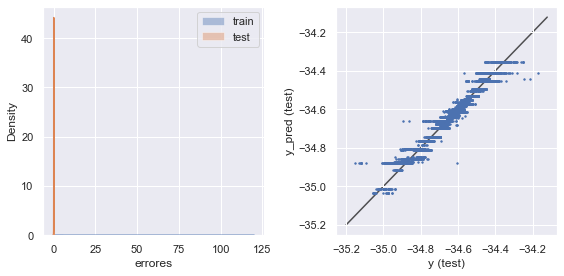

In [170]:
evaluacion_modelo(y_train, y_train_pred_kn,y_test, y_test_pred_kn)

#### Arbol de decisión para latitud

In [171]:
tree_regressor_Lat = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor_Lat.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [172]:
y_train_pred_tree = tree_regressor_Lat.predict(X_train)
y_test_pred_tree = tree_regressor_Lat.predict(X_test)

Raíz del error cuadrático medio en Train: 0.5556893561726295
Raíz del error cuadrático medio en Test: 0.036930992130080026


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


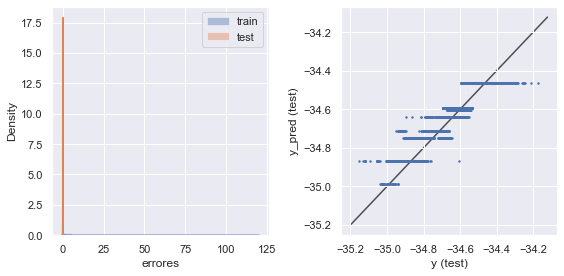

In [173]:
evaluacion_modelo(y_train, y_train_pred_tree,y_test, y_test_pred_tree)

Nos encontramos con que los modelos estan un poco overfiteados pero vamos a utilizar el modelo de arbol de decion.


Realizare lo mismo para longitud

In [174]:
y = datosLatLonNoNull.lon
X= datosLatLonNoNull.drop(columns = 'lon')

In [175]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(93464, 5) (93464,) (40057, 5) (40057,)


#### Vecinos mas cercanos para longitud

In [176]:
knn_regressor_Lon = KNeighborsRegressor(n_neighbors=5)

In [177]:
knn_regressor_Lon.fit(X_train, y_train)

KNeighborsRegressor()

In [178]:
y_train_pred_kn = knn_regressor_Lon.predict(X_train)
y_test_pred_kn = knn_regressor_Lon.predict(X_test)

Raíz del error cuadrático medio en Train: 0.3270224758135811
Raíz del error cuadrático medio en Test: 0.01499300845088439


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


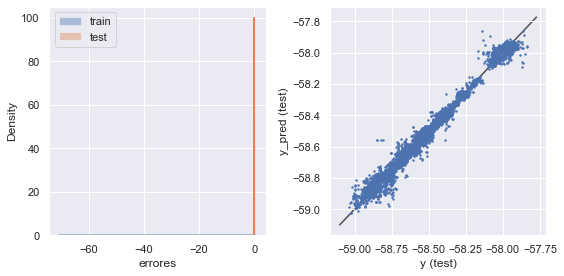

In [179]:
evaluacion_modelo(y_train, y_train_pred_kn,y_test, y_test_pred_kn)

#### Arbol de decision para longitud

In [180]:
tree_regressor_Lon = DecisionTreeRegressor(max_depth=3, random_state=42)

In [181]:
tree_regressor_Lon.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [182]:
y_train_pred_tree = tree_regressor_Lon.predict(X_train)
y_test_pred_tree = tree_regressor_Lon.predict(X_test)

Raíz del error cuadrático medio en Train: 0.09547244999368432
Raíz del error cuadrático medio en Test: 0.09229981974800688


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


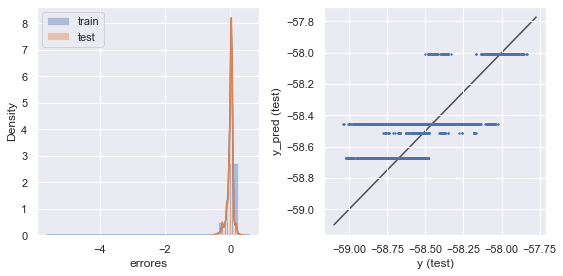

In [183]:
evaluacion_modelo(y_train, y_train_pred_tree,y_test, y_test_pred_tree)

El arbol de decision tiene menor error, por lo tanto utilizare este modelo para latitud y longitud

#### Predicciones latitud:

In [184]:
data_numerica_lat = data_filtro.loc[:,['lat',"lon","l2","l3"]]

In [185]:
data_numerica_lat = pd.get_dummies(data_numerica_lat, columns=['l2'], drop_first=True)

In [186]:
enc = LabelEncoder()
enc.fit(data_numerica_lat['l3'])
country_enc = enc.transform(data_numerica_lat['l3'])
data_numerica_lat.loc[:,'l3'] = country_enc

In [187]:
 data_numerica_lat.isna().sum()

lat                            9593
lon                            9624
l3                                0
l2_Bs.As. G.B.A. Zona Oeste       0
l2_Bs.As. G.B.A. Zona Sur         0
l2_Capital Federal                0
dtype: int64

In [188]:
data_numerica_lat[data_numerica_lat['lat'].isnull()]

,lat,lon,l3,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal
17,NaN,NaN,70,0,0,0
26,NaN,NaN,45,1,0,0
35,NaN,NaN,48,0,0,1
36,NaN,NaN,48,0,0,1
46,NaN,NaN,48,0,0,1
...,...,...,...,...,...,...
146571,NaN,NaN,70,0,0,0
146575,NaN,NaN,70,0,0,0
146577,NaN,NaN,70,0,0,0
146578,NaN,NaN,70,0,0,0


In [189]:
X_Sin_Lat= data_numerica_lat[data_numerica_lat['lat'].isnull()]
X_Sin_Lat = X_Sin_Lat.drop(columns = ['lat','lon'])

In [190]:
X_Sin_Lat

,l3,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal
17,70,0,0,0
26,45,1,0,0
35,48,0,0,1
36,48,0,0,1
46,48,0,0,1
...,...,...,...,...
146571,70,0,0,0
146575,70,0,0,0
146577,70,0,0,0
146578,70,0,0,0


In [191]:
pred_Lat = tree_regressor_Lat.predict(X_Sin_Lat)

In [192]:
len(pred_Lat)

9593

Completo el dataset con los datos predichos

In [193]:
data_filtro.loc[data_filtro['lat'].isnull(), 'lat'] = pred_Lat

In [194]:
data_filtro.isna().sum()

start_date                        0
end_date                          0
created_on                        0
lat                               0
lon                            9624
l2                                0
l3                                0
rooms                             0
bedrooms                          0
bathrooms                         0
surface_total                 18623
surface_covered               18909
price                             0
property_type_Departamento        0
property_type_PH                  0
dtype: int64

#### Predicciones longitud:

In [195]:
data_numerica_lon = data_filtro.loc[:,['lat',"lon","l2","l3"]]

In [196]:
data_numerica_lon = pd.get_dummies(data_numerica_lon, columns=['l2'], drop_first=True)

In [197]:
enc = LabelEncoder()
enc.fit(data_numerica_lon['l3'])
country_enc = enc.transform(data_numerica_lon['l3'])
data_numerica_lon.loc[:,'l3'] = country_enc

In [198]:
 data_numerica_lon.isna().sum()

lat                               0
lon                            9624
l3                                0
l2_Bs.As. G.B.A. Zona Oeste       0
l2_Bs.As. G.B.A. Zona Sur         0
l2_Capital Federal                0
dtype: int64

In [199]:
data_numerica_lon[data_numerica_lon['lon'].isnull()]

,lat,lon,l3,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal
17,-34.464560,NaN,70,0,0,0
26,-34.639903,NaN,45,1,0,0
35,-34.595562,NaN,48,0,0,1
36,-34.595562,NaN,48,0,0,1
46,-34.595562,NaN,48,0,0,1
...,...,...,...,...,...,...
146571,-34.464560,NaN,70,0,0,0
146575,-34.464560,NaN,70,0,0,0
146577,-34.464560,NaN,70,0,0,0
146578,-34.464560,NaN,70,0,0,0


In [200]:
X_Sin_Lon= data_numerica_lon[data_numerica_lon['lon'].isnull()]
X_Sin_Lon = X_Sin_Lon.drop(columns = 'lon')

In [201]:
X_Sin_Lon

,lat,l3,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal
17,-34.464560,70,0,0,0
26,-34.639903,45,1,0,0
35,-34.595562,48,0,0,1
36,-34.595562,48,0,0,1
46,-34.595562,48,0,0,1
...,...,...,...,...,...
146571,-34.464560,70,0,0,0
146575,-34.464560,70,0,0,0
146577,-34.464560,70,0,0,0
146578,-34.464560,70,0,0,0


In [202]:
pred_Lon = tree_regressor_Lon.predict(X_Sin_Lon)

In [203]:
len(pred_Lon)

9624

Completo los valores nulos con los datos predichos:

In [204]:
data_filtro.loc[data_filtro['lon'].isnull(), 'lon'] = pred_Lon

In [205]:
data_filtro.isna().sum()

start_date                        0
end_date                          0
created_on                        0
lat                               0
lon                               0
l2                                0
l3                                0
rooms                             0
bedrooms                          0
bathrooms                         0
surface_total                 18623
surface_covered               18909
price                             0
property_type_Departamento        0
property_type_PH                  0
dtype: int64

Ahora que ya tengo completo los datos de latitud y longitud, como estos reflejan la informacion que brindan las variables l2 y l3, estas ultimas 2 las voy a eliminar del dataset, ya que son variables categoricas que deberia pasarlas a numericas pero los metodos para realizar esto me agregarian muchas columnas por lo tanto utilizare las columnas de lat y lon para determinar donde se encuentra el inmueble

In [206]:
data_filtro = data_filtro.drop(columns = ['l2','l3'])
data_filtro

,start_date,end_date,created_on,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Departamento,property_type_PH
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,1,0
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,0,1
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,0,1
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,0,1
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,2.0,1.0,1.0,50.0,35.0,40000.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,2.0,1.0,1.0,54.0,48.0,165000.0,1,0
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,4.0,3.0,2.0,164.0,90.0,130000.0,1,0
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,1.0,1.0,1.0,50.0,35.0,73000.0,1,0
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,2.0,1.0,1.0,38.0,38.0,68000.0,1,0


#### Superficie total y cubierta

Ahora analizare los datos nulos de las variables surface_total y surface_covered

In [207]:
data_filtro[data_filtro["surface_total"].isna() | data_filtro["surface_covered"].isna()]

,start_date,end_date,created_on,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Departamento,property_type_PH
722,2019-04-25,2019-06-23,2019-04-25,-34.577620,-58.465122,2.0,1.0,1.0,35.0,NaN,89000.0,1,0
723,2019-04-25,2019-06-18,2019-04-25,-34.639903,-58.454048,2.0,1.0,1.0,NaN,NaN,75000.0,1,0
727,2019-04-25,2019-06-18,2019-04-25,-34.639903,-58.454048,2.0,1.0,1.0,NaN,NaN,75000.0,1,0
728,2019-04-25,2019-06-18,2019-04-25,-34.639903,-58.454048,2.0,1.0,1.0,NaN,NaN,75000.0,1,0
890,2019-04-25,2019-06-18,2019-04-25,-34.639903,-58.454048,3.0,2.0,1.0,NaN,NaN,120000.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145610,2020-01-20,9999-12-31,2020-01-20,-34.579296,-58.451458,4.0,4.0,1.0,162.0,NaN,395000.0,0,0
145619,2020-01-20,9999-12-31,2020-01-20,-34.596275,-58.374802,5.0,4.0,6.0,200.0,NaN,750000.0,1,0
145625,2020-01-20,9999-12-31,2020-01-20,-34.594103,-58.415911,6.0,5.0,3.0,257.0,NaN,690000.0,1,0
145640,2019-07-31,2020-01-17,2019-07-31,-34.708806,-58.387257,3.0,2.0,1.0,NaN,1.0,95000.0,1,0


Para poder completar los datos de estas 2 variables, volvere a realizar un modelo de regresión para determinar su valor. Utilizaré todas las variables exceptuando las variables de fechas.

In [208]:
data_Sin_dates = data_filtro.drop(columns = ["start_date","end_date","created_on"])

In [209]:
datosSupNoNull = data_Sin_dates[pd.notnull(data_Sin_dates["surface_total"]) & pd.notnull(data_Sin_dates["surface_covered"])]
datosSupNoNull

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Departamento,property_type_PH
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,1,0
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,0,1
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,0,1
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,0,1
4,-34.914194,-57.938219,2.0,1.0,1.0,50.0,35.0,40000.0,0,1
...,...,...,...,...,...,...,...,...,...,...
146655,-34.816348,-58.181963,2.0,1.0,1.0,54.0,48.0,165000.0,1,0
146656,-34.446459,-58.937810,4.0,3.0,2.0,164.0,90.0,130000.0,1,0
146657,-34.444633,-58.981606,1.0,1.0,1.0,50.0,35.0,73000.0,1,0
146658,-34.444830,-58.981796,2.0,1.0,1.0,38.0,38.0,68000.0,1,0


#### Vecinos mas cercanos para superficie total

In [210]:
y_supTotal = datosSupNoNull.surface_total
X_supTotal= datosSupNoNull.drop(columns = ['surface_total','surface_covered'])

In [211]:
X_train, X_test, y_train, y_test = train_test_split(
    X_supTotal, y_supTotal, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(86608, 8) (86608,) (37118, 8) (37118,)


In [212]:
knn_regressor_supTotal = KNeighborsRegressor(n_neighbors=6)

In [213]:
knn_regressor_supTotal.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [214]:
y_train_pred_kn = knn_regressor_supTotal.predict(X_train)
y_test_pred_kn = knn_regressor_supTotal.predict(X_test)

Raíz del error cuadrático medio en Train: 1253.77743529848
Raíz del error cuadrático medio en Test: 1574.2565508972602


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


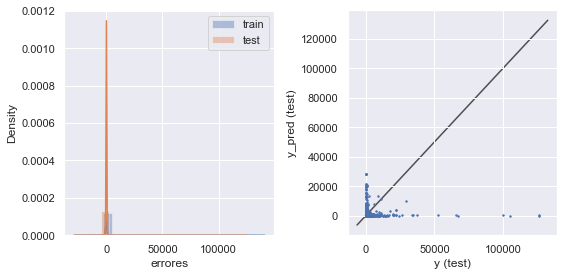

In [215]:
evaluacion_modelo(y_train, y_train_pred_kn,y_test, y_test_pred_kn)

#### Arbol de decisión para superficie total

In [216]:
tree_regressor_supTotal = DecisionTreeRegressor(max_depth=4, random_state=42)

In [217]:
tree_regressor_supTotal.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [218]:
y_train_pred_tree = tree_regressor_supTotal.predict(X_train)
y_test_pred_tree = tree_regressor_supTotal.predict(X_test)

Raíz del error cuadrático medio en Train: 1371.6540461457198
Raíz del error cuadrático medio en Test: 1539.8169194767659


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


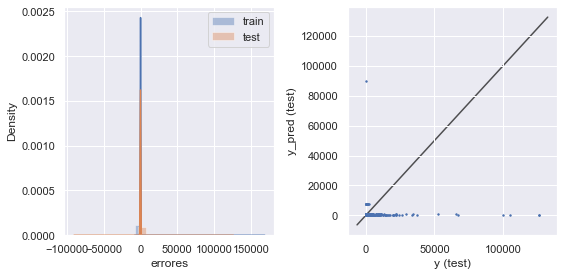

In [219]:
evaluacion_modelo(y_train, y_train_pred_tree,y_test, y_test_pred_tree)

Siendo mejor, por una pequeña diferencia (menor diferencia entre sus errores), arboles de decision para la variable superficie total.

#### Vecinos mas cercanos para superficie cubierta

In [220]:
y_supCubierta = datosSupNoNull.surface_covered
X_supCubierta= datosSupNoNull.drop(columns = ['surface_covered'])

In [221]:
X_train, X_test, y_train, y_test = train_test_split(
    X_supCubierta, y_supCubierta, test_size=0.30, random_state=42)

In [222]:
knn_regressor_supCubierta = KNeighborsRegressor(n_neighbors=4)

In [223]:
knn_regressor_supCubierta.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [224]:
y_train_pred_kn = knn_regressor_supCubierta.predict(X_train)
y_test_pred_kn = knn_regressor_supCubierta.predict(X_test)

Raíz del error cuadrático medio en Train: 691.3141073890216
Raíz del error cuadrático medio en Test: 914.5960552804839


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


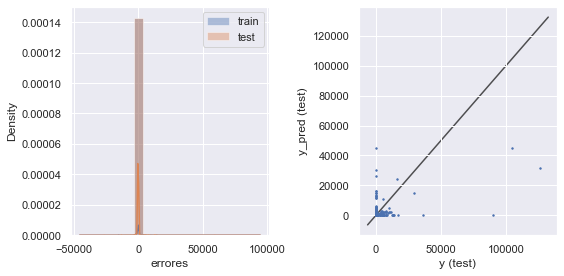

In [225]:
evaluacion_modelo(y_train, y_train_pred_kn,y_test, y_test_pred_kn)

#### Arbol de decision para superficie cubierta

In [226]:
tree_regressor_supCubierta = DecisionTreeRegressor(max_depth=2, random_state=42)

In [227]:
tree_regressor_supCubierta.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [228]:
y_train_pred_tree = tree_regressor_supCubierta.predict(X_train)
y_test_pred_tree = tree_regressor_supCubierta.predict(X_test)

Raíz del error cuadrático medio en Train: 738.695800362305
Raíz del error cuadrático medio en Test: 978.5459993291097


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


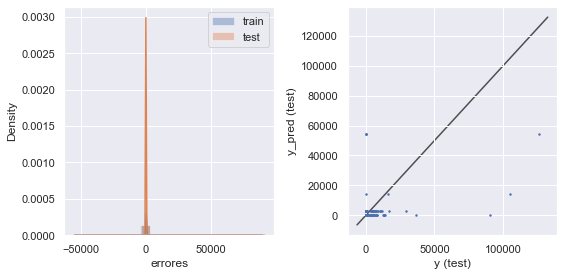

In [229]:
evaluacion_modelo(y_train, y_train_pred_tree,y_test, y_test_pred_tree)

Nuevamente observamos que por una pequeña diferncia arbol de decision es un mejor modelo

#### Predicciones superficie total:

In [230]:
X_Sin_SupTotal= data_Sin_dates[data_Sin_dates['surface_total'].isnull()]
X_Sin_SupTotal = X_Sin_SupTotal.drop(columns = ['surface_total','surface_covered'])

In [231]:
pred_SupTotal = tree_regressor_supTotal.predict(X_Sin_SupTotal)

In [232]:
data_filtro.loc[data_filtro['surface_total'].isnull(), 'surface_total'] = pred_SupTotal

#### Predicciones superficie cubierta:

In [233]:
data_Sin_dates = data_filtro.drop(columns = ["start_date","end_date","created_on"])

In [234]:
X_Sin_SupCubierta= data_Sin_dates[data_Sin_dates['surface_covered'].isnull()]
X_Sin_SupCubierta = X_Sin_SupCubierta.drop(columns = 'surface_covered')

In [235]:
pred_SupCubierta = tree_regressor_supCubierta.predict(X_Sin_SupCubierta)

In [236]:
data_filtro.loc[data_filtro['surface_covered'].isnull(), 'surface_covered'] = pred_SupCubierta

Luego de todo esto, ya no tenemos mas datos nulos:

In [237]:
data_filtro.isna().sum()

start_date                    0
end_date                      0
created_on                    0
lat                           0
lon                           0
rooms                         0
bedrooms                      0
bathrooms                     0
surface_total                 0
surface_covered               0
price                         0
property_type_Departamento    0
property_type_PH              0
dtype: int64

### Escalado de datos

Utilizaré escalado ya que hay mucha diferencia en las unidades, es decir, no es lo mismo una unidad en baños que una unidad en superficie o precio, por lo tanto para que nuestro modelo no sea suceptible a esto, realizaré escalado de datos.

In [238]:
data_filtro

,start_date,end_date,created_on,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Departamento,property_type_PH
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,1,0
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,0,1
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,0,1
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,0,1
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,2.0,1.0,1.0,50.0,35.0,40000.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,2.0,1.0,1.0,54.0,48.0,165000.0,1,0
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,4.0,3.0,2.0,164.0,90.0,130000.0,1,0
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,1.0,1.0,1.0,50.0,35.0,73000.0,1,0
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,2.0,1.0,1.0,38.0,38.0,68000.0,1,0


Para empezar voy a eliminar las columnas de fechas ya que por el momento no las voy a utilizar

In [239]:
data_filtro = data_filtro.drop(columns = ["start_date","end_date","created_on"])

In [240]:
data_filtro

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Departamento,property_type_PH
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,1,0
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,0,1
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,0,1
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,0,1
4,-34.914194,-57.938219,2.0,1.0,1.0,50.0,35.0,40000.0,0,1
...,...,...,...,...,...,...,...,...,...,...
146655,-34.816348,-58.181963,2.0,1.0,1.0,54.0,48.0,165000.0,1,0
146656,-34.446459,-58.937810,4.0,3.0,2.0,164.0,90.0,130000.0,1,0
146657,-34.444633,-58.981606,1.0,1.0,1.0,50.0,35.0,73000.0,1,0
146658,-34.444830,-58.981796,2.0,1.0,1.0,38.0,38.0,68000.0,1,0


Creare una funcion para utilizar standardscaler y que sea mas rapido escalar todos los datos, ya que tengo que hacer lo mismo para cada uno. Cabe destacar que esta funcion solo sirve para este dataset en esta instacia, ya que estamos usando la variable "data_filtro" haciendo que la funcion no sea reutilizable para otro dataset

In [241]:
def escalador(columna):
    scaler = StandardScaler()
    scaler.fit(data_filtro[columna].values.reshape(-1, 1))
    data_filtro[columna] = scaler.transform(data_filtro[columna].values.reshape(-1, 1))

In [242]:
escalador('lat')
escalador('lon')
escalador('rooms')
escalador('bedrooms')
escalador('bathrooms')
escalador('surface_total')
escalador('surface_covered')
escalador('price')

In [243]:
data_filtro

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Departamento,property_type_PH
0,-0.010255,0.175429,2.802315,4.428683,0.469891,-0.036116,0.034248,-0.294407,1,0
1,-0.049944,0.118356,-0.786845,-0.885195,0.469891,-0.086639,-0.061508,-0.273581,0,1
2,0.016628,0.086072,-0.786845,-0.885195,-0.658411,-0.104683,-0.076688,-0.391595,0,1
3,0.043432,0.066572,-0.786845,-0.885195,-0.658411,-0.075813,-0.070850,0.198479,0,1
4,-0.683502,1.114132,-0.786845,-0.885195,-0.658411,-0.101074,-0.088366,-0.686632,0,1
...,...,...,...,...,...,...,...,...,...,...
146655,-0.469842,0.601958,-0.786845,-0.885195,-0.658411,-0.098187,-0.073185,-0.252754,1,0
146656,0.337863,-0.986284,0.648819,0.886098,0.469891,-0.018794,-0.024139,-0.374240,1,0
146657,0.341850,-1.078312,-1.504677,-0.885195,-0.658411,-0.101074,-0.088366,-0.572089,1,0
146658,0.341420,-1.078712,-0.786845,-0.885195,-0.658411,-0.109735,-0.084863,-0.589444,1,0


### Implementación del modelo del proyecto 1

Ejecutare nuevamente el modelo del proyecto 1 que elegi como mejor modelo. 

In [244]:
y = data_filtro.price
X= data_filtro.drop(columns = 'price')

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(100201, 9) (100201,) (42944, 9) (42944,)


In [246]:
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)

In [247]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [248]:
y_train_pred_tree = tree_regressor.predict(X_train)
y_test_pred_tree = tree_regressor.predict(X_test)

Raíz del error cuadrático medio en Train: 0.7370811597509173
Raíz del error cuadrático medio en Test: 0.710333755040437


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


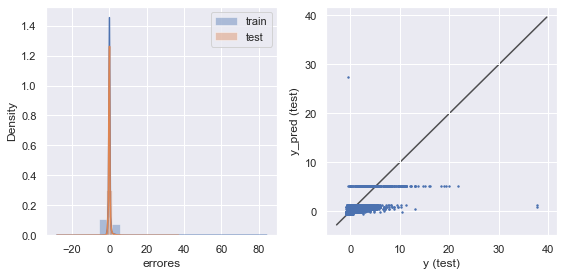

In [249]:
evaluacion_modelo(y_train, y_train_pred_tree,y_test, y_test_pred_tree)

In [250]:
print("R2 en train:",metrics.r2_score(y_train, y_train_pred_tree))
print("R2 en test:",metrics.r2_score(y_test, y_test_pred_tree))

R2 en train: 0.4652647425126839
R2 en test: 0.4758639725191418


El modelo con los datos re-entrenado es ampliamente mejor el modelo anterior, obteniendo una diferencia abismal en los errores encontrados en cada uno. Esto se debe principalmente a que escalé los datos, por lo tanto el error disminuyo ya que los datos y la distancias entre ellos son mucho menores. Ademas use mas columnas (mas informacion) para entrenar el modelo, que anteriormente habia eliminado por ser variables categoricas y creo que tambien mejoro porque en esta ocasión tengo mas registros, ya que no elimine los valores nulos, sino que los pude reemplazar. Es decir, que el modelo tuvo mas información para entrenarse, lo que llevo a un mejor rendimiento.

## PARTE B - Modelos Avanzados

A continuación probaré distintos modelos intentando llegar a el menor o mayor error segun corresponda. 

### Bagging

In [251]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(100201, 9) (100201,) (42944, 9) (42944,)


In [252]:
bagging_reg = BaggingRegressor(base_estimator=tree_regressor, bootstrap_features=False, n_estimators= 100, n_jobs = -1)

In [253]:
bagging_reg.fit(X_train, y_train)
y_train_pred = bagging_reg.predict(X_train)
y_test_pred = bagging_reg.predict(X_test)


Raíz del error cuadrático medio en Train: 0.7000233520465426
Raíz del error cuadrático medio en Test: 0.7043892279675175


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


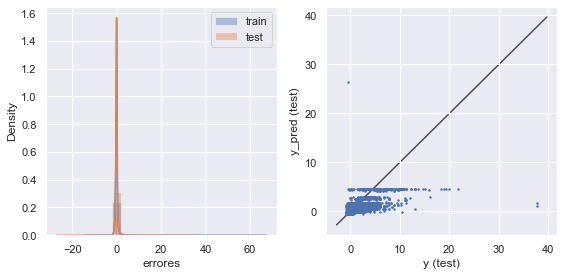

In [254]:
evaluacion_modelo(y_train, y_train_pred,y_test, y_test_pred)

In [255]:
print("R2 en train:",metrics.r2_score(y_train, y_train_pred))
print("R2 en test:",metrics.r2_score(y_test, y_test_pred))

R2 en train: 0.5176822390607985
R2 en test: 0.48459987596608745


Con este modelo obtenemos un error levemente mas pequeño que al usar arbol de decision

#### Optimización de paramentros

Este modelo con tantos registros tarda mucho en ejecutarse por lo tanto tome una porcion del dataset al azar para que se ejecute un poco mas rapido

In [158]:
data_sample = data_filtro.sample(50000)
y_sample = data_sample.price
X_sample= data_sample.drop(columns = 'price')

In [183]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(35000, 9) (35000,) (15000, 9) (15000,)


In [184]:
tree_reg_bag = DecisionTreeRegressor()

In [185]:
knn_reg_bag = KNeighborsRegressor()

In [186]:
param_dist = {'base_estimator':[tree_reg_bag,knn_reg_bag],
              'max_features': np.arange(1,11)
              }


Elegi estos parametros porque:
* base_estimator: permite probar que modelo es mejor para nuestros datos, este hiperparametro marca la diferencia entre los modelos. En este caso decidi colocar los 2 modelos que veniamos viendo, arboles de desicion y vecinos cercanos. 
* max_features: me parece que este es un hiperparamentro importante ya que va a definir si nuestro modelo esta overfiteado o underfiteado. Coloque valores del 1 al 10 ya que por experiencia suelen encontrarse entre los valores 3 a 8, le di un margen por si este no era el caso.

In [187]:
bagging_reg = BaggingRegressor(bootstrap_features=False,n_jobs = -1,n_estimators=100)

In [188]:
model_bagging_reg = RandomizedSearchCV(bagging_reg, param_dist,n_iter=10, random_state=0, cv=5)

In [189]:
model_bagging_reg.fit(X_train, y_train)

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_bagging.py", line 321, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Usuario\miniconda3\envs\datasc

RandomizedSearchCV(cv=5,
                   estimator=BaggingRegressor(n_estimators=100, n_jobs=-1),
                   param_distributions={'base_estimator': [DecisionTreeRegressor(),
                                                           KNeighborsRegressor()],
                                        'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
                   random_state=0)

In [190]:
print("Mejores parametros: "+str(model_bagging_reg.best_params_))
print("Mejor Score: "+str(model_bagging_reg.best_score_)+'\n')

Mejores parametros: {'max_features': 7, 'base_estimator': DecisionTreeRegressor()}
Mejor Score: 0.7894397493741183



Implementacion de los mejores hiperparametros 

In [195]:
bagging_reg = BaggingRegressor(base_estimator=knn_reg_bag, bootstrap_features=False, n_estimators= 100, n_jobs = -1,max_features=2)

In [196]:
bagging_reg.fit(X_train, y_train)
y_train_pred = bagging_reg.predict(X_train)
y_test_pred = bagging_reg.predict(X_test)

Raíz del error cuadrático medio en Train: 0.5579397283792957
Raíz del error cuadrático medio en Test: 0.61377791499096


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


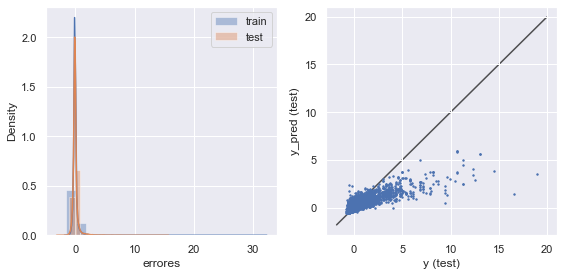

In [197]:
evaluacion_modelo(y_train, y_train_pred,y_test, y_test_pred)

In [198]:
print("R2 en train:",metrics.r2_score(y_train, y_train_pred))
print("R2 en test:",metrics.r2_score(y_test, y_test_pred))

R2 en train: 0.6533609250219998
R2 en test: 0.5879455436323666


Vemos que con la optimizacion de parametros el error disminuye. Para este modelo usariamos los hiperparametros: 'base_estimator': KNeighborsRegressor(), 'n_estimators': 100. Pero si bien disminuye, observamos un poco de overfiting. Quizas se podria seguir optimizando hiperparametros o probar con otros para que el mismo disminuya y no exista tanta diferencia entre los errores

### Random Forest


In [146]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(100201, 9) (100201,) (42944, 9) (42944,)


In [147]:
randomForest_reg = RandomForestRegressor(n_estimators=100,max_depth=6, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)

In [148]:
randomForest_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, max_features='sqrt', n_jobs=-1,
                      oob_score=True, random_state=42)

In [149]:
y_train_pred = randomForest_reg.predict(X_train)
y_test_pred = randomForest_reg.predict(X_test)

Raíz del error cuadrático medio en Train: 0.54765531054988
Raíz del error cuadrático medio en Test: 0.5776362723526484


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


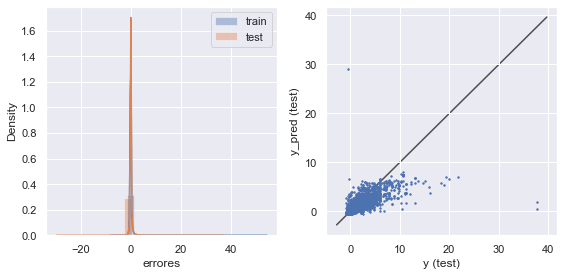

In [150]:
evaluacion_modelo(y_train, y_train_pred,y_test, y_test_pred)

Los errores disminuyen considerablemente en este modelo y vemos que la diferencia entre ellos tambien lo hace, indicando en principio que es un buen modelo.


#### Optimizacion de parametros

Nuevamente achicare el dataset para una mayor velocidad de ejecucion

In [209]:
data_sample = data_filtro.sample(50000)
y_sample = data_sample.price
X_sample= data_sample.drop(columns = 'price')
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(35000, 9) (35000,) (15000, 9) (15000,)


In [250]:
randomForest_reg = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score = True, random_state = 42)

In [251]:
param_grid = {'max_features':['auto', 'sqrt', 'log2'] , 
              'max_depth':np.arange(2,7) ,
              }

En tanto al hiperparamentro de max features considere todas las opciones que se indicaban en la documentacion y en cuanto a max_depth utilice un rango que considero suele indicar un mejor modelo sin under ni overfiting 

In [252]:
model_randomForest_reg = RandomizedSearchCV(randomForest_reg, param_grid,n_iter=10, random_state=0, cv=5)


In [253]:
model_randomForest_reg.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, oob_score=True,
                                                   random_state=42),
                   param_distributions={'max_depth': array([2, 3, 4, 5, 6]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2']},
                   random_state=0)

In [254]:
print("Mejores parametros: "+str(model_randomForest_reg.best_params_))
print("Mejor Score: "+str(model_randomForest_reg.best_score_)+'\n')

Mejores parametros: {'max_features': 'log2', 'max_depth': 6}
Mejor Score: 0.6289046375722883



##### Evaluo el modelo con los mejores parametros

In [151]:
randomForest_reg = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score = True, random_state = 42,max_features= 'log2',max_depth=6)

In [152]:
randomForest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features='log2', n_jobs=-1,
                      oob_score=True, random_state=42)

Raíz del error cuadrático medio en Train: 0.54765531054988
Raíz del error cuadrático medio en Test: 0.5776362723526484


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


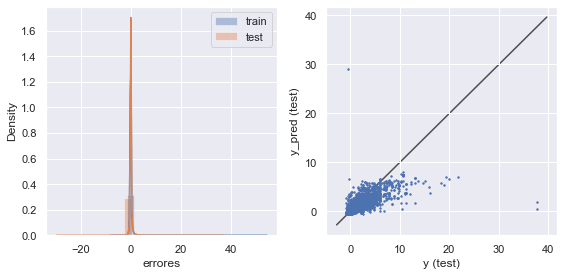

In [153]:
evaluacion_modelo(y_train, y_train_pred,y_test, y_test_pred)

In [154]:
print("R2 en train:",metrics.r2_score(y_train, y_train_pred))
print("R2 en test:",metrics.r2_score(y_test, y_test_pred))

R2 en train: 0.7047956140435059
R2 en test: 0.6534004292388775


### Boosting

In [226]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(100201, 9) (100201,) (42944, 9) (42944,)


In [155]:
adaBoost_reg = AdaBoostRegressor( n_estimators=100)

In [156]:
adaBoost_reg.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100)

In [157]:
y_train_pred = adaBoost_reg.predict(X_train)
y_test_pred = adaBoost_reg.predict(X_test)

Raíz del error cuadrático medio en Train: 1.1955845377519476
Raíz del error cuadrático medio en Test: 1.2542096699599878


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


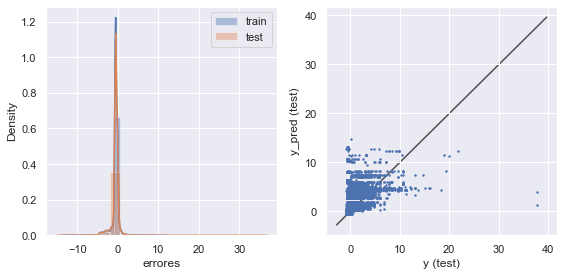

In [158]:
evaluacion_modelo(y_train, y_train_pred,y_test, y_test_pred)

#### Optimización de parametros

Nuevamente disminuire la cantidad de registros del dataset

In [213]:
data_sample = data_filtro.sample(25000)
y_sample = data_sample.price
X_sample= data_sample.drop(columns = 'price')
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(17500, 9) (17500,) (7500, 9) (7500,)


In [214]:
tree_reg_bag = DecisionTreeRegressor()
knn_reg_bag = KNeighborsRegressor()

In [216]:
adaBoost_reg = AdaBoostRegressor()

In [220]:
param_grid = {'base_estimator':[tree_reg_bag,knn_reg_bag] , 
              'loss':['linear', 'square', 'exponential'],
              'n_estimators': [50,100,150,200,1000]
              }

Con respecto al primer hiperparametro, como mencione anteriormente decidi utilizar modelos ya conocidos. En tanto a loss, utilice todos los valores que meciona en la documentacion. Por ultimo con n_estimators, genere valores que crei que podian traer mejores resultados partiendo que por defecto si no se coloca nada toma el valor de 50

In [221]:
model_adaBoost_reg = RandomizedSearchCV(adaBoost_reg, param_grid, n_iter=5, random_state=0, cv=5)

In [222]:
model_adaBoost_reg.fit(X_train, y_train) 

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_iter=5,
                   param_distributions={'base_estimator': [DecisionTreeRegressor(),
                                                           KNeighborsRegressor()],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100, 150, 200,
                                                         1000]},
                   random_state=0)

In [223]:
print("Mejores parametros: "+str(model_adaBoost_reg.best_params_))
print("Mejor Score: "+str(model_adaBoost_reg.best_score_)+'\n')

Mejores parametros: {'n_estimators': 150, 'loss': 'linear', 'base_estimator': DecisionTreeRegressor()}
Mejor Score: 0.595093478843871



In [224]:
adaBoost_reg = AdaBoostRegressor( n_estimators=150, loss='linear',base_estimator=tree_reg_bag)

In [227]:
adaBoost_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=150)

In [228]:
y_train_pred = adaBoost_reg.predict(X_train)
y_test_pred = adaBoost_reg.predict(X_test)

Raíz del error cuadrático medio en Train: 0.20431079182516268
Raíz del error cuadrático medio en Test: 0.44109929405003195


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


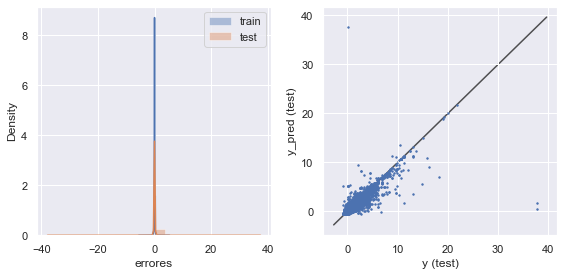

In [229]:
evaluacion_modelo(y_train, y_train_pred,y_test, y_test_pred)

In [230]:
print("R2 en train:",metrics.r2_score(y_train, y_train_pred))
print("R2 en test:",metrics.r2_score(y_test, y_test_pred))

R2 en train: 0.9589142884382299
R2 en test: 0.7978881242956952


### XGBoost

In [148]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(93464, 5) (93464,) (40057, 5) (40057,)


In [232]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [233]:
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [234]:
y_train_pred = xg_reg.predict(X_train)
y_test_pred = xg_reg.predict(X_test)

Raíz del error cuadrático medio en Train: 0.8383053759266206
Raíz del error cuadrático medio en Test: 0.8092182116403511


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


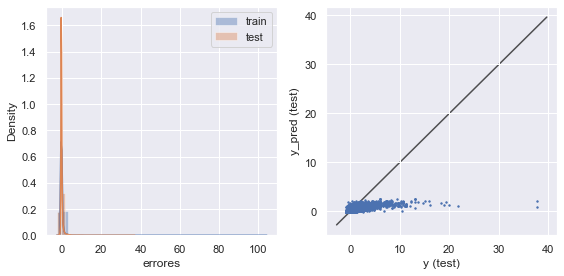

In [235]:
evaluacion_modelo(y_train, y_train_pred,y_test, y_test_pred)

#### Optimización de hiperparametros

In [237]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                alpha = 10, n_estimators = 10)

In [238]:
param_dist = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}

Buscando informacion sobre XGBoost y leyendo su documentacion encontre que estos eran buenos hiperparametros para probar con sus respectivos valores.

In [239]:
model_xg_reg = RandomizedSearchCV(xg_reg, param_dist, n_iter=100, random_state=0, cv=5)

In [240]:
model_xg_reg.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(alpha=10, base_score=None,
                                          booster=None, colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimat...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=100,
                   param_distrib

In [241]:
print("Mejores parametros: "+str(model_xg_reg.best_params_))
print("Mejor Score: "+str(model_xg_reg.best_score_)+'\n')

Mejores parametros: {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.01, 'colsample_bytree': 0.8}
Mejor Score: 0.7537954539933304



Implementacion de los mejores parametros

In [147]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',  learning_rate = 0.01, gamma=0.01,colsample_bytree=0.8,
                 alpha = 4, n_estimators = 500, subsample=0.6,reg_lambda=2, reg_alpha=1, min_child_weight=7, max_depth=10)

In [149]:
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=4, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=10,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=2, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [169]:
y_train_pred_XGBoost = xg_reg.predict(X_train)
y_test_pred_XGBoost = xg_reg.predict(X_test)

Raíz del error cuadrático medio en Train: 0.4186961346240277
Raíz del error cuadrático medio en Test: 0.4272728786260526


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


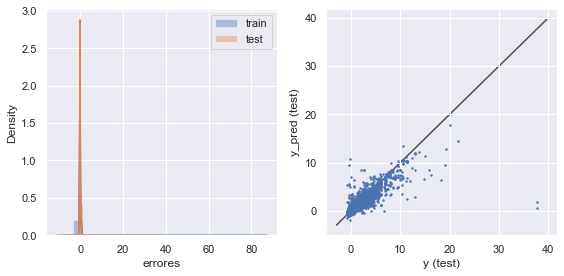

In [170]:
evaluacion_modelo(y_train, y_train_pred_XGBoost,y_test, y_test_pred_XGBoost)

In [171]:
print('R2 en train:',metrics.r2_score(y_train, y_train_pred_XGBoost))
print('R2 en test:',metrics.r2_score(y_test, y_test_pred_XGBoost))

R2 en train: 0.8274535207587845
R2 en test: 0.8103600813406195


### Eleccion de modelo

Resumiendo tenemos que:
* Bagging: 
    * Raíz del error cuadrático medio en Train: 0.5579397283792957
    * Raíz del error cuadrático medio en Test: 0.61377791499096
    * R2 en train: 0.6533609250219998
    * R2 en test: 0.5879455436323666
* Random forest:
    * Raíz del error cuadrático medio en Train: 0.5433644788588406
    * Raíz del error cuadrático medio en Test: 0.5623605399170027
    * R2 en train: 0.7094032940076898
    * R2 en test: 0.6714898552602806
* Boosting
    * Raíz del error cuadrático medio en Train: 0.20431079182516268
    * Raíz del error cuadrático medio en Test: 0.44109929405003195
    * R2 en train: 0.9589142884382299
    * R2 en test: 0.7978881242956952
* XGBoost 
    * Raíz del error cuadrático medio en Train: 0.4186961346240277
    * Raíz del error cuadrático medio en Test: 0.4272728786260526
    * R2 en train: 0.8274535207587845
    * R2 en test: 0.8103600813406195
    
        

Luego de analizar los resultados de los modelos, descarto en primer lugar los modelos de bagging y boosting por su diferencia entre errores de test y train, overfitting, quizas estos modelos se pueden mejorar cambiando los hiperparametros. Luego comparando entre random forest y XGBoost, encontramos que el RMSE es menor en el segundo modelo y por otro lado el R2 es  mayor en el mismo, indicando que este es el mejor modelo para nuestros datos. 

Los errores que obtuvimos del modelo del proyecto 1 son:

* Raíz del error cuadrático medio en Train: 0.7569017835938666
* Raíz del error cuadrático medio en Test: 0.7165538365999702
* R2 en train: 0.41937624531197293
* R2 en test: 0.29400527382002295

Observamos que el RMSE es mas grande que los del XGBoost y el R2 es menor al mismo, indicando que nuestro nuevo modelo es mejor al creado anteriormente. Por lo tanto para nuestros datos encontramos que el mejor modelo es XGBoost con los parametros  {'max_depth': 5, 'learning_rate': 0.39142857142857146, 'colsample_bytree': 0.8364285714285714, 'alpha': 4}

## PARTE C - interpretación de modelos

Para determinar que variables fueron importantes para el modelo XGBoost utilizo la funcion feature_importances_:

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


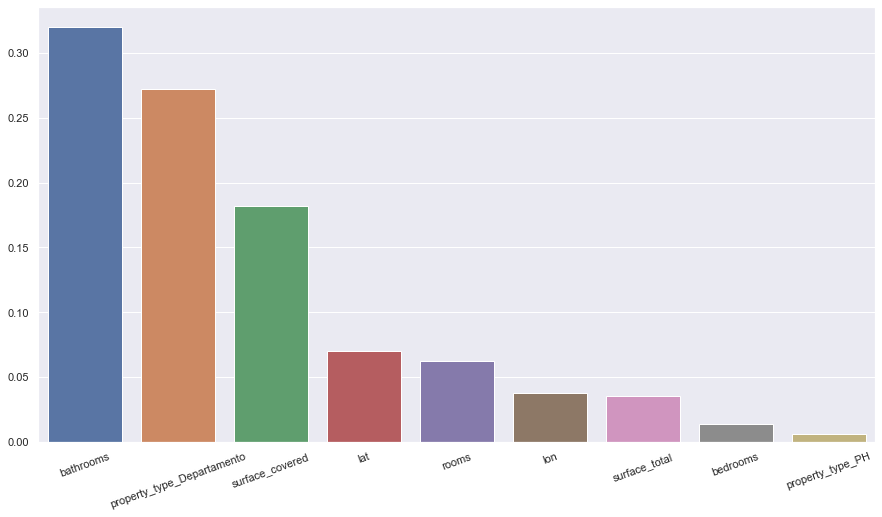

In [295]:
importances = xg_reg.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=20)
plt.show()

Como el grafico nos muestra, bathrooms, property_type_Departamento y surface_covered son las variables que mas influencia tuvieron en el modelo. Por otro lado, tenemos que las menos relevantes fueron lon, surface_total, bedrooms y property_type_PH. 

En lo personal, pense que la variable que mas iba a influir era la superficie y luego el tipo de propiedad. Me sorprendio que la primera haya sido la cantidad de baños de una propiedad.

Ahora voy a graficar la distribucion del error que obtuve con el modelo XGBoost con los hiperparametros optimizados. Para ellos calculo la diferencia entre el y_test_pred del modelo XGBOost y el y_test real


In [174]:
error = y_test_pred_XGBoost - y_test

In [175]:
error

114941    0.045490
68022    -0.268119
83304    -0.055683
140877   -0.223876
24329    -0.017284
            ...   
15742    -0.038022
102732   -0.442756
132969    0.150295
110534    0.042728
84101    -0.041264
Name: price, Length: 42944, dtype: float64

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

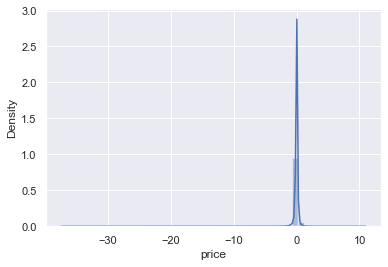

In [186]:
sns.set_style('darkgrid')
sns.distplot(error)

A grandes razgos se ve que el error recae en el valor cero, lo que era de esperarse ya que cuando entrenamos el modelo obtuvimos los errores cerca de este valor, indicando que es un buen modelo. Ademas se puede observa que hay algunos errores que llegan a valores muy bajos como -30 pero creo que no es tan relevante ya que son muy pocos o la minoria. Estos errores en -30 estaria indicando que el modelo predice precios menores al valor real en mayor medida que al reves. 

Por otro lado, tambien quiero graficar el y predic y el y test para ver si estos coinciden. 

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

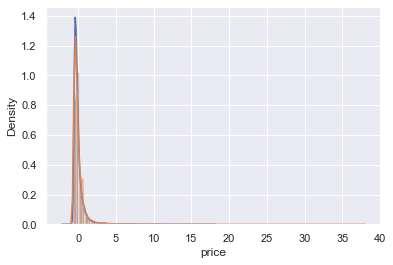

In [190]:
sns.set_style('darkgrid')
sns.distplot(y_test_pred_XGBoost)
sns.set_style('darkgrid')
sns.distplot(y_test)


Vemos que en general coinciden bastante los valores, lo que tambien era de esperarse

Antes de avanzar con el desafio opcional me gustaria dejar lo aprendido hasta el momento. Para empezar, la parte de limpieza de datos, me parece que fue muy interesante y me parecio sumamente importante para poder generar mayor valor a los datos y no desperdiciar informacion. En la imputacion de valores faltantes que realicé modelos para poder predecir el valor de latitud y longitud me gusto que luego de realizar eso puede comprobar que los valores que obtuve estaban situados en los valores que indicaban los valores de l2 y l3. En otra instancia de mejoramiento estaria bueno averiguar como tratar las fechas, ya que las variables de fecha de publicacion nos pueden dar informacion util por ejemplo si la publicacion es mas vieja es probable que el costo del inmueble disminuya. Tambien realizar procesos de clustering para poder achicar el modelo sin perder informacion, ya que de todos modos lo tuve que hacer para poder entrenar los modelos en un menor tiempo, estaria bueno hacerlo de una forma que no sea al azar. <br>
Por otro lado en la parte B, utilice modelos de machine learning avanzados que en su mayoria se basan en los modelos ya utilizados. Con cada uno de ellos fui viendo algunas diferencias, sobre todo en el tiempo de ejecucion del mismo, por ejemplo el modelo XGBoost es mucho mas rapido que Adaboosting. Por otro lado, en los modelos adaboosting y bagging me costo mas optimizar los hiperparametros, al punto de que preferi dejar los modelos overfiteados y probar con otros modelos. Quizas en una nueva instancia de mejoramiento del proyecto deberia probar con nuevos hiperparametros y averiguar un poco sobre que valores deberian tomar en estos 2 modelos que no pude optimizar.  <br>
Finalmente con el modelo que determine que es el mejor, encontre buenos resultados y estoy contenta con los mismos, para mejor me quedaria agregar clustering y poder utilizar las columnas que elimine por no saber como tratarlas.

## Desafio opcional

In [256]:
data_clus = data_clus.drop(columns=['start_date','end_date','created_on', 'l1','l3','title','description','operation_type','currency' ])

In [257]:
data_clus 

,lat,lon,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,-34.624056,-58.412110,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0,PH
3,-34.581294,-58.436754,Capital Federal,2.0,1.0,1.0,85.0,50.0,295000.0,PH
8,-34.639598,-58.419612,Capital Federal,1.0,1.0,1.0,45.0,37.0,89000.0,PH
9,-34.639598,-58.419612,Capital Federal,1.0,1.0,1.0,45.0,37.0,89000.0,PH
10,-34.586225,-58.496220,Capital Federal,2.0,1.0,2.0,66.0,49.0,170000.0,PH
...,...,...,...,...,...,...,...,...,...,...
146644,-34.445077,-58.621163,Bs.As. G.B.A. Zona Norte,3.0,2.0,2.0,97.0,80.0,260000.0,Departamento
146645,-34.446847,-58.632600,Bs.As. G.B.A. Zona Norte,3.0,2.0,2.0,90.0,80.0,250000.0,Departamento
146646,-34.444630,-58.620901,Bs.As. G.B.A. Zona Norte,3.0,2.0,2.0,96.0,83.0,280000.0,Departamento
146654,-34.602389,-58.591058,Bs.As. G.B.A. Zona Oeste,3.0,2.0,2.0,161.0,80.0,200000.0,Departamento


Voy a utilizar las tecnicas de clustering para encontrar las ciudades dentro del dataset. Para empezar achicare el dataset ya que DBScan es muy costoso computacionalmente hablando

In [258]:
data_sample_clus = data_clus.sample(25000)

Empiezo graficando las 2 variables que nos estan mostrando las ubicaciones de todos los inmuebles.

<AxesSubplot:xlabel='lat', ylabel='lon'>

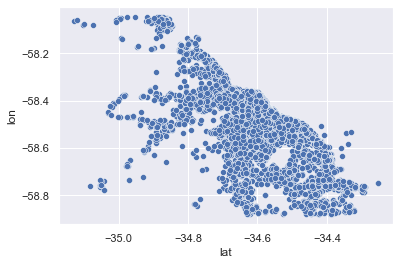

In [259]:
sns.scatterplot(x = data_sample_clus['lat'], y = data_sample_clus['lon'])

In [260]:
X= data_sample_clus.loc[:,('lat','lon')]

In [261]:
X

,lat,lon
1733,-34.619519,-58.521203
52553,-34.550517,-58.559008
123128,-34.432920,-58.818865
44385,-34.599322,-58.412792
90825,-34.388790,-58.877868
...,...,...
128953,-34.601364,-58.430143
132050,-34.579001,-58.489101
14516,-34.586735,-58.481058
65288,-34.817538,-58.459861


### K-means

Por haber trabajado con el dataset de antemano ya se que contamos con 4 ciudades pero probare con distintos numeros de cluster para poder comparar

In [262]:
from sklearn.cluster import KMeans


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


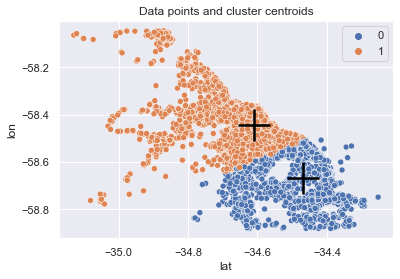

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


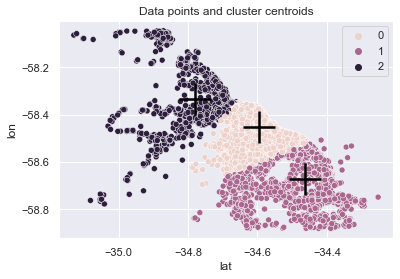

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


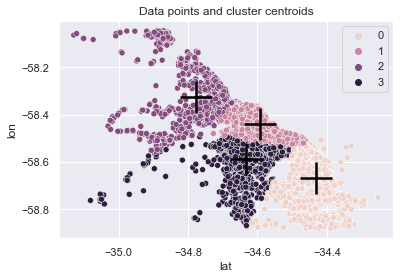

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


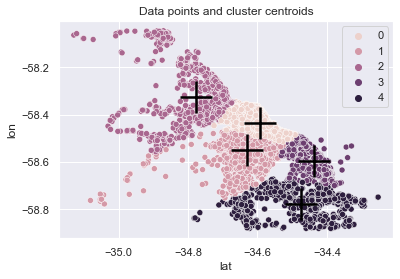

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


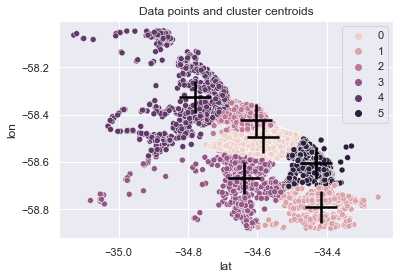

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


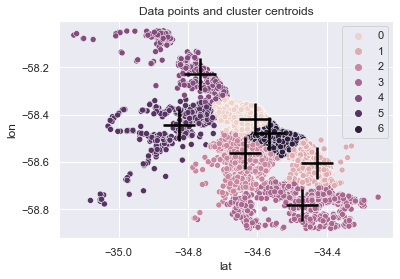

In [263]:
for i in range(2,8):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    etiquetas = kmeans.labels_
    centros = kmeans.cluster_centers_
    sns.scatterplot(X['lat'], X['lon'], hue = etiquetas)
    sns.scatterplot(centros[:, 0], centros[:, 1],color='black', marker="+", s=1000)
    plt.title('Data points and cluster centroids')
    plt.show()

Si lo comparo con los valores reales:

<AxesSubplot:xlabel='lat', ylabel='lon'>

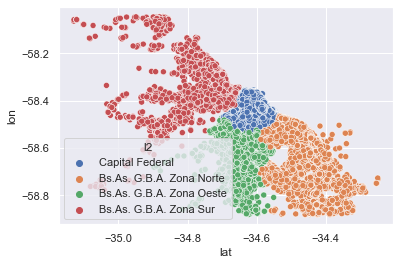

In [35]:
sns.scatterplot(x = data_clus['lat'], y = data_clus['lon'], hue=data_clus['l2'])

Podemos observar que coincide bastante con los datos reales, el modelo pudo detectar bien la variable l2